In [3]:
import pandas as pd
import numpy as np
import splearn.Metrics as spmet
import sklearn.metrics as skmet

from splearn.EnsembleLearning.AdaBooster import AdaBooster
from splearn.EnsembleLearning.TreeBagger import TreeBagger
from splearn.EnsembleLearning.RandomForest import RandomForest
from splearn.DecisionTree.DecisionTree import DecisionTree

In [4]:
train_df = pd.read_csv("data/bank/train.csv")
test_df = pd.read_csv("data/bank/test.csv")

X_train = train_df[train_df.columns[:-1]]
y_train = train_df[train_df.columns[-1]]

X_test = test_df[test_df.columns[:-1]]
y_test = test_df[test_df.columns[-1]]

train_df.head()

,age,job,marital,edu,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [5]:
# Prime all models for training at iters = 0

ab = AdaBooster(DecisionTree)
tb = TreeBagger()
rf1 = RandomForest()
rf2 = RandomForest()
rf3 = RandomForest()
rf4 = RandomForest()

ab.train(
    X_train,
    y_train,
    iterations = 0,
    learner_args = {
        "gain": "gini",
        "max_depth": 2
    }
)

tb.train(
    X_train,
    y_train,
    0,
    seed = 42,
    gain = "gini"
)

rf1.train(
    X_train,
    y_train,
    num_trees = 0,
    feature_frac = 3.0 / len(X_train.columns),
    seed = 420,
    gain = "gini"
)

rf2.train(
    X_train,
    y_train,
    num_trees = 0,
    feature_frac = 5.0 / len(X_train.columns),
    seed = 420,
    gain = "gini"
)

rf3.train(
    X_train,
    y_train,
    num_trees = 0,
    feature_frac = 7.0 / len(X_train.columns),
    seed = 420,
    gain = "gini"
)

rf4.train(
    X_train,
    y_train,
    num_trees = 0,
    feature_frac = 9.0 / len(X_train.columns),
    seed = 420,
    gain = "gini"
)

models = [
    #ab, 
    #tb,
    rf1,
    rf2, 
    rf3,
    rf4
]

num_obs = 9
points = [2 ** i for i in range(num_obs)]

data = []

for i in points:

    while len(models[0]) < i:
        [m.iterate(1) for m in models]
        print(f"Iteration {len(models[1])} complete!")

    p = []
    p.append(i)
    
    for m in models:
        p_train = m.predict(X_train)
        p_test  = m.predict(X_test)
        p.append(skmet.accuracy_score(y_train, p_train))
        p.append(skmet.accuracy_score(y_test, p_test))

    data.append(p)
        

Iteration 1 complete!
Iteration 2 complete!
Iteration 3 complete!
Iteration 4 complete!
Iteration 5 complete!
Iteration 6 complete!
Iteration 7 complete!
Iteration 8 complete!
Iteration 9 complete!
Iteration 10 complete!
Iteration 11 complete!
Iteration 12 complete!
Iteration 13 complete!
Iteration 14 complete!
Iteration 15 complete!
Iteration 16 complete!
Iteration 17 complete!
Iteration 18 complete!
Iteration 19 complete!
Iteration 20 complete!
Iteration 21 complete!
Iteration 22 complete!
Iteration 23 complete!
Iteration 24 complete!
Iteration 25 complete!
Iteration 26 complete!
Iteration 27 complete!
Iteration 28 complete!
Iteration 29 complete!
Iteration 30 complete!
Iteration 31 complete!
Iteration 32 complete!
Iteration 33 complete!
Iteration 34 complete!
Iteration 35 complete!
Iteration 36 complete!
Iteration 37 complete!
Iteration 38 complete!
Iteration 39 complete!
Iteration 40 complete!
Iteration 41 complete!
Iteration 42 complete!
Iteration 43 complete!
Iteration 44 complet

In [8]:
data = np.array(data)

columns = [
    "num_trees",
    "rf3_train",
    "rf3_test",
    "rf5_train",
    "rf5_test",
    "rf7_train",
    "rf7_test",
    "rf9_train",
    "rf9_test",
]

df = pd.DataFrame(data, columns = columns)
df.to_csv("wrtg_analysis.csv")
df = df.set_index(columns[0])
df

,rf3_train,rf3_test,rf5_train,rf5_test,rf7_train,rf7_test,rf9_train,rf9_test
num_trees,,,,,,,,
1.0,0.8912,0.8834,0.8904,0.8792,0.8884,0.8804,0.8880,0.8690
2.0,0.8912,0.8834,0.8882,0.8782,0.8970,0.8686,0.8934,0.8544
4.0,0.8808,0.8752,0.8834,0.8774,0.9000,0.8818,0.9176,0.8720
8.0,0.8812,0.8750,0.8874,0.8802,0.9006,0.8862,0.9202,0.8802
16.0,0.8816,0.8756,0.8910,0.8804,0.9026,0.8840,0.9226,0.8848
32.0,0.8808,0.8752,0.8836,0.8762,0.8996,0.8812,0.9200,0.8876
64.0,0.8808,0.8752,0.8814,0.8752,0.8974,0.8804,0.9182,0.8868
128.0,0.8808,0.8752,0.8848,0.8752,0.8982,0.8804,0.9162,0.8880
256.0,0.8808,0.8752,0.8830,0.8752,0.8970,0.8792,0.9158,0.8878


In [38]:
train_unique, train_counts = np.unique(y_train, return_counts=True)
test_unique,  test_counts  = np.unique(y_test,  return_counts=True)

print(train_unique, train_counts)
print(test_unique,  test_counts )

print(train_counts[0] / sum(train_counts))
print(test_counts[0] / sum(test_counts))

['no' 'yes'] [4404  596]
['no' 'yes'] [4376  624]
0.8808
0.8752


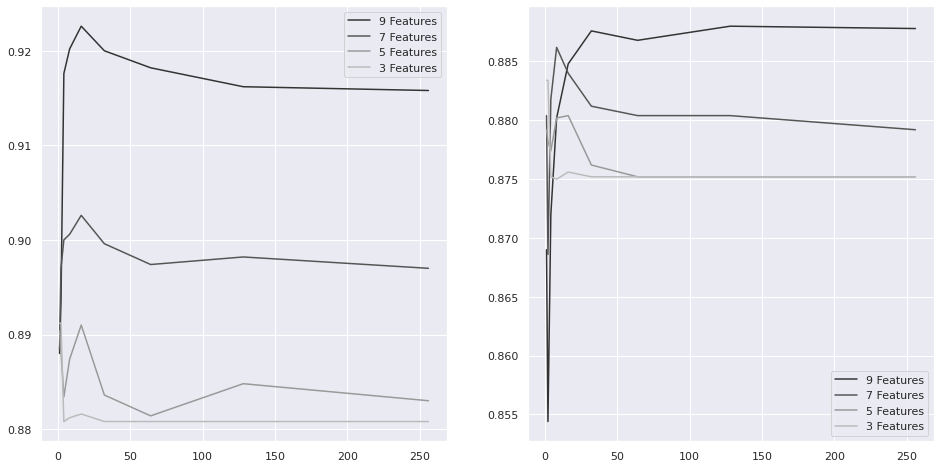

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig = plt.Figure
axs = list(plt.Axes)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth (16)

axs[0].plot(df.index, df["rf9_train"], color="#333333", label="9 Features")
axs[0].plot(df.index, df["rf7_train"], color="#555555", label="7 Features")
axs[0].plot(df.index, df["rf5_train"], color="#999999", label="5 Features")
axs[0].plot(df.index, df["rf3_train"], color="#BBBBBB", label="3 Features")
axs[0].legend()

axs[1].plot(df.index, df["rf9_test"], color="#333333", label="9 Features")
axs[1].plot(df.index, df["rf7_test"], color="#555555", label="7 Features")
axs[1].plot(df.index, df["rf5_test"], color="#999999", label="5 Features")
axs[1].plot(df.index, df["rf3_test"], color="#BBBBBB", label="3 Features")
axs[1].legend()